# Personal Loan Data from Prosper
## by Zalon Wong

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The terms in this data set are explained in details in [this webpage](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
ploan = pd.read_csv('prosperLoanData.csv')
ploan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [19]:
ploan.EmploymentStatusDuration.describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

### What is the structure of your dataset?

The data set has 113,937 columns (loans) with 81 rows (variables). 

### What is/are the main feature(s) of interest in your dataset?

The data set covers data pertaining to the loan applications handled by Prosper. I am intereted in looking at what factors affect a loan’s outcome status and interest rate. For the former, I want to investigate those charged off and defaulted  loans. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will look at these variables:  
LoanStatus - 1   
BorrowerRate - 2  
EmploymentStatus  
EmploymentStatusDuration - 1   
IsBorrowerHomeowner - 1  
CreditScoreRangeLower  
CreditScoreRangeUpper  
CurrentDelinquencies  
AmountDelinquent  
AvailableBankcardCredit - 2  
DebtToIncomeRatio  - 1  
IncomeRange  
StatedMonthlyIncome - 1, 2



## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

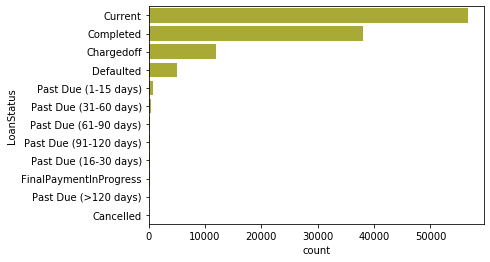

In [14]:
b_color = sb.color_palette()[8]
bar_order = ploan['LoanStatus'].value_counts().index
sb.countplot(data=ploan, y='LoanStatus',color=b_color, order=bar_order )


**Loan Status:**   
All the entries here are approved loan applications. Status show how far has the borrowers have come through. Most of the applications are current, which means borrowers are making timely repayment. The second most frequent status is completed. A significant amount of applications are charged off and defaulted -- it is interesting if we can find any trend of what kind of borrowers usually turn a debt into a bad one.   
I can combine all those past due into one status for analysis. 

In [16]:
ploan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

Text(0.5, 0, 'Employment Status Duration (Month)')

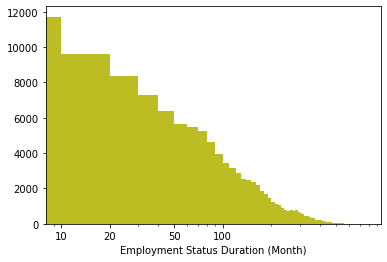

In [23]:
base_color = sb.color_palette()[8]

bin_edge = np.arange(0, ploan.EmploymentStatusDuration.max()+10, 10 )
plt.hist(data=ploan, x='EmploymentStatusDuration',color=base_color, bins=bin_edge)

plt.xscale('log')
ticks_loc = [10, 20, 50, 100]
plt.xticks(ticks_loc, ticks_loc)

plt.xlabel('Employment Status Duration (Month)')

**Employment Status**  
Most loan applicants are employed, in different forms. Most people are at the beginning in the employment status when they get the loans. The higher the employment status duration is, the less likely one takes a loan.   
But how are those employed and retired like in terms of the status duration tho? 

Text(0.5, 0, 'Borrower is a home owner')

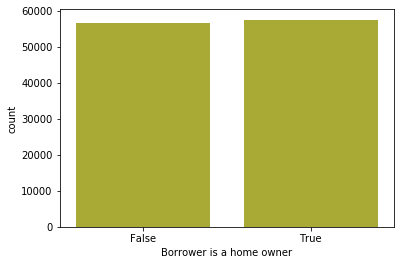

In [26]:
sb.countplot(data=ploan, x='IsBorrowerHomeowner', color=base_color)
plt.xlabel('Borrower is a home owner')

**Home ownership**  
Slightly more than half of the borrowers are home owner and the rest are not.   
Does it mean home ownership doesn't have much impact? Probably not but we will need to look at some specific groups of borrowers. 

In [28]:
ploan.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

([<matplotlib.axis.XTick at 0x1a1f956310>,
 <a list of 7 Text xticklabel objects>)

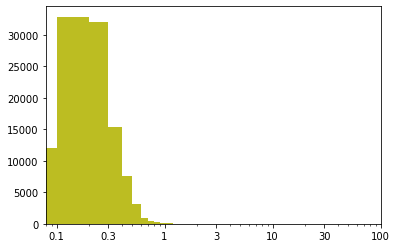

In [37]:
bin_edge = np.arange(0, ploan.DebtToIncomeRatio.max()+0.1, 0.1)

plt.hist(data=ploan, x='DebtToIncomeRatio', bins=bin_edge, color=base_color)
plt.xscale('log')
ticks_loc = [0.1, 0.3, 1, 3, 10, 30, 100]
plt.xticks(ticks_loc, ticks_loc)

**Debt To Income Ratio**  
The debt to income ratio mostly are between 0.1 to 0.3. Very few people actually get a debt to income ratio higher than 0.3.

In [39]:
ploan.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

([<matplotlib.axis.XTick at 0x1a2d1e0610>,
 <a list of 7 Text xticklabel objects>)

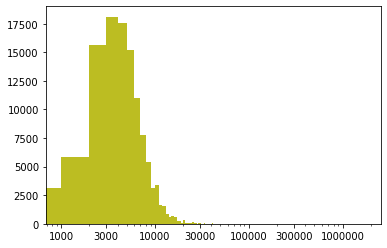

In [43]:
bin_edge = np.arange(0, ploan.StatedMonthlyIncome.max()+500,1000 ) 


plt.hist(data=ploan, x='StatedMonthlyIncome', bins=bin_edge, color=base_color)
plt.xscale('log')
ticks_loc = [1000, 3000, 10000, 30000, 100000, 300000, 1000000]
plt.xticks(ticks_loc, ticks_loc)



**Stated Monthly Income**  
Unimodality is shown, with a peak at 4k - 6k. 

In [44]:
ploan.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

(array([1.300e+01, 1.300e+01, 1.000e+00, 1.100e+01, 7.200e+01, 3.430e+02,
        1.525e+03, 2.546e+03, 3.755e+03, 4.182e+03, 4.888e+03, 4.312e+03,
        5.192e+03, 4.886e+03, 6.212e+03, 6.515e+03, 5.432e+03, 5.228e+03,
        5.169e+03, 4.707e+03, 5.363e+03, 3.759e+03, 3.119e+03, 3.695e+03,
        4.021e+03, 3.693e+03, 4.040e+03, 2.411e+03, 2.526e+03, 3.757e+03,
        1.608e+03, 7.340e+03, 4.700e+02, 5.730e+02, 2.510e+03, 2.400e+01,
        1.700e+01, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
 <a list of 50 Patch objects

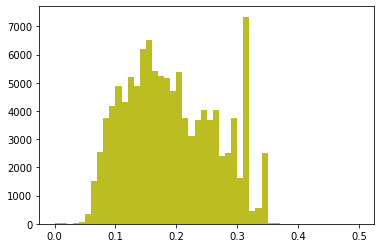

In [66]:
bin_edge = np.arange(0, ploan.BorrowerRate.max()+0.01, 0.01)

plt.hist(data=ploan, x='BorrowerRate', color=base_color, bins=bin_edge)


**BorrowerRate**  
The borrower rate is actually pretty high. It ranges from 0% to 49.75%. It looks like normal distribution but with a strange peak at around 30%. 

In [56]:
ploan.AvailableBankcardCredit.describe()  

count    106393.000000
mean      11210.225447
std       19818.361309
min           0.000000
25%         880.000000
50%        4100.000000
75%       13180.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64

([<matplotlib.axis.XTick at 0x1a3b64f350>,
 <a list of 8 Text xticklabel objects>)

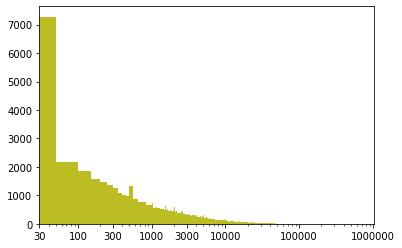

In [65]:
bin_edge = np.arange(0, ploan.AvailableBankcardCredit.max()+50, 50)

plt.hist(data=ploan, x='AvailableBankcardCredit', color=base_color, bins=bin_edge)

plt.xscale('log')
ticks_loc = [30, 100, 300, 1000, 3000, 10000, 100000, 1000000]
plt.xticks(ticks_loc, ticks_loc)


**Available Bank card Credit**  
Right skewed with a peak at 30 - 40 credit. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I did logarithmic transformation on employment status duration, Stated Monthly Income, Available Bank card Credit. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The are some strange peak in some histograms but I didn't explore it. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!